<a href="https://colab.research.google.com/github/applemahmudd/CNN-Project/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

**Load Dataset (Auto Download)**

In [6]:
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.IVN7PN_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


**Preprocess Images**

In [7]:
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

**Build CNN Model**

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile Model**

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 51ms/step - accuracy: 0.6177 - loss: 0.6615 - val_accuracy: 0.7399 - val_loss: 0.5126
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.7720 - loss: 0.4794 - val_accuracy: 0.7872 - val_loss: 0.4668
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.8196 - loss: 0.4013 - val_accuracy: 0.7631 - val_loss: 0.5219
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8682 - loss: 0.3074 - val_accuracy: 0.7719 - val_loss: 0.6283
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.9136 - loss: 0.2121 - val_accuracy: 0.7650 - val_loss: 0.7606


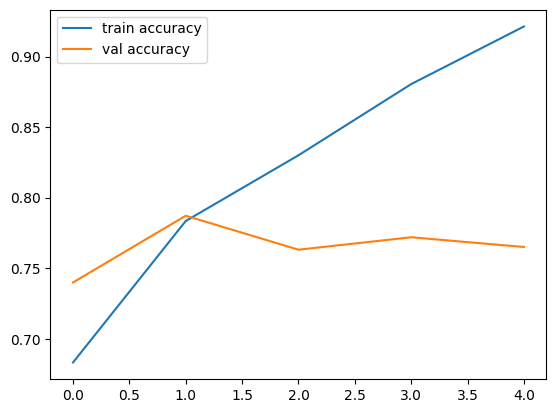

In [11]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()